In [151]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from datapackage import Package
import seaborn as sns
from numpy.linalg import inv

# data description

In [54]:
def adj_price(stocks, start_date, end_date):
    data = yf.download(stocks, start=start_date, end=end_date , interval="1d")
    return data["Adj Close"]

[*********************100%***********************]  1 of 1 completed


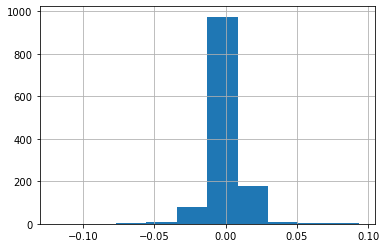

In [55]:
sp500 = adj_price("^GSPC", "2016-01-01", "2020-12-31")
returns_sp500 = sp500.pct_change()
returns_sp500.hist()
plt.show()

In [56]:
# Print the mean
print("mean : ", returns_sp500.mean()*100)

# Print the standard deviation
print("Std. dev  : ", returns_sp500.std()*100)

# Print the skewness
print("skew : ", returns_sp500.skew())

# Print the kurtosis
print("kurt : ", returns_sp500.kurtosis())

mean :  0.05525992407554855
Std. dev  :  1.2118512892096482
skew :  -0.7268721187857626
kurt :  20.494881880997198


In [57]:
sector = pd.read_csv("constituents_csv.csv")
sector.value_counts('Sector')
sp500_list = sector.Symbol.tolist()

In [65]:
# historical price 5 year
# price_5_year = adj_price(sp500_list, "2016-01-01", "2020-12-31")
# price_5_year.to_csv("final_hist_stock_price.csv")
price_5_year = pd.read_csv("final_hist_stock_price.csv", parse_dates=['Date'], index_col='Date')

## Clean Data

In [68]:
price_5_year.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,39.780807,40.471588,146.405624,24.302439,44.666813,93.505241,90.279999,40.095913,94.687836,93.940002,...,30.270300,42.542244,57.979973,58.437458,33.971024,47.227505,98.078400,69.650002,24.287739,46.085125
2016-01-04,38.715160,39.095455,148.088425,24.323219,43.437801,91.846306,85.239998,38.328159,92.268524,91.970001,...,30.093283,41.482536,57.615501,56.526360,33.580135,46.684441,97.332710,66.489998,23.762840,45.460018
2016-01-05,38.581959,38.722763,147.076797,23.713696,43.256844,93.189674,85.000000,38.319229,92.748764,92.339996,...,30.396746,42.098427,58.106426,57.678776,33.570824,46.568069,99.359451,64.820000,23.504839,46.171684
2016-01-06,38.753227,39.401257,143.185867,23.249626,43.264378,91.765144,85.300003,37.997822,92.567558,91.019997,...,30.717062,41.328568,57.622952,56.843266,33.151997,46.238346,99.789696,62.230000,22.819798,46.181301
2016-01-07,37.107189,38.655853,144.771408,22.268383,43.136200,88.834923,81.919998,37.087158,89.849243,89.110001,...,30.835085,39.698246,56.700623,56.343884,32.295742,44.660866,97.495224,59.410000,22.134762,44.777203


In [67]:
price_5_year.isnull().sum(axis=0).sort_values()

A           3
NWL         3
NVR         3
NVDA        3
NUE         3
         ... 
CARR     1063
OTIS     1063
BF.B     1262
OGN      1262
BRK.B    1262
Length: 505, dtype: int64

In [69]:
df[df.g>3]

,g
BF.B,1262
BRK.B,1262
CARR,1063
CDAY,586
CTVA,857
DOW,811
FOX,806
FOXA,805
FTV,130
HWM,214


In [70]:
ba = pd.Series(price_5_year.isnull().sum(axis=0), name="g")
df = ba.to_frame()
df = df[df.g>3]
cut_stock = df.index.to_list()
sector_index = sector.set_index('Symbol')
sector_index.loc[cut_stock, :]

,Name,Sector
Symbol,,
BF.B,Brown–Forman,Consumer Staples
BRK.B,Berkshire Hathaway,Financials
CARR,Carrier Global,Industrials
CDAY,Ceridian,Information Technology
CTVA,Corteva,Materials
DOW,Dow,Materials
FOX,Fox Corporation (Class B),Communication Services
FOXA,Fox Corporation (Class A),Communication Services
FTV,Fortive,Industrials


In [71]:
sp500_list 
cut_stock 
for stock in list(sp500_list):  # iterating on a copy since removing will mess things up
    if stock in cut_stock:
        sp500_list.remove(stock)

In [72]:
df_full = price_5_year[sp500_list]
df_full.head(5)

,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,AAP,...,WLTW,WYNN,XEL,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,126.231018,34.937634,40.095913,44.666813,90.279999,94.687836,37.239159,30.550133,93.940002,146.405624,...,118.716492,62.666252,30.270300,42.542244,33.971024,47.227505,69.650002,98.078400,24.287739,46.085125
2016-01-04,123.029976,34.285492,38.328159,43.437801,85.239998,92.268524,36.190575,29.850519,91.970001,148.088425,...,115.319016,62.285862,30.093283,41.482536,33.580135,46.684441,66.489998,97.332710,23.762840,45.460018
2016-01-05,123.566261,34.093952,38.319229,43.256844,85.000000,92.748764,35.728813,30.183672,92.339996,147.076797,...,116.112427,63.463280,30.396746,42.098427,33.570824,46.568069,64.820000,99.359451,23.504839,46.171684
2016-01-06,121.077507,33.419006,37.997822,43.264378,85.300003,92.567558,35.392117,29.450735,91.019997,143.185867,...,116.112427,60.175541,30.717062,41.328568,33.151997,46.238346,62.230000,99.789696,22.819798,46.181301
2016-01-07,118.127876,31.786354,37.087158,43.136200,81.919998,89.849243,34.891869,28.751110,89.110001,144.771408,...,106.064232,54.514839,30.835085,39.698246,32.295742,44.660866,59.410000,97.495224,22.134762,44.777203


In [76]:
sector = sector.set_index('Symbol')
sector = sector_index.loc[sp500_list , :]
sector = sector.reset_index()
sector.Sector.value_counts()

Information Technology    73
Industrials               69
Financials                64
Health Care               62
Consumer Discretionary    62
Consumer Staples          30
Real Estate               29
Utilities                 28
Materials                 26
Communication Services    25
Energy                    21
Name: Sector, dtype: int64

In [78]:
dict_sector = {}
for i in sector.Sector.unique().tolist():
    list = sector[sector['Sector']== i ].Symbol.tolist()
    each_sector_dict = {i : list}
    dict_sector.update(each_sector_dict)
print(dict_sector)

{'Industrials': ['MMM', 'AOS', 'ALK', 'ALLE', 'AAL', 'AME', 'BA', 'CHRW', 'CAT', 'CTAS', 'CPRT', 'CSX', 'CMI', 'DE', 'DAL', 'DOV', 'ETN', 'EMR', 'EFX', 'EXPD', 'FAST', 'FDX', 'FBHS', 'GNRC', 'GD', 'GE', 'HON', 'HII', 'IEX', 'INFO', 'ITW', 'JBHT', 'J', 'JCI', 'KSU', 'LHX', 'LDOS', 'LMT', 'MAS', 'NLSN', 'NSC', 'NOC', 'ODFL', 'PCAR', 'PH', 'PNR', 'PWR', 'RTX', 'RSG', 'RHI', 'ROK', 'ROL', 'ROP', 'SNA', 'LUV', 'SWK', 'TDY', 'TXT', 'TT', 'TDG', 'UNP', 'UAL', 'UPS', 'URI', 'VRSK', 'GWW', 'WAB', 'WM', 'XYL'], 'Health Care': ['ABT', 'ABBV', 'ABMD', 'A', 'ALGN', 'ABC', 'AMGN', 'ANTM', 'BAX', 'BDX', 'BIO', 'TECH', 'BIIB', 'BSX', 'BMY', 'CAH', 'CTLT', 'CNC', 'CERN', 'CRL', 'CI', 'CVS', 'DHR', 'DVA', 'XRAY', 'DXCM', 'EW', 'LLY', 'GILD', 'HCA', 'HSIC', 'HOLX', 'HUM', 'IDXX', 'ILMN', 'INCY', 'ISRG', 'IQV', 'JNJ', 'LH', 'MCK', 'MDT', 'MRK', 'MTD', 'PKI', 'PFE', 'DGX', 'REGN', 'RMD', 'STE', 'SYK', 'TFX', 'COO', 'TMO', 'UNH', 'UHS', 'VRTX', 'VTRS', 'WAT', 'WST', 'ZBH', 'ZTS'], 'Information Technology': 

In [80]:
type_sector_list = sector.Sector.unique().tolist()
type_sector_list

['Industrials',
 'Health Care',
 'Information Technology',
 'Communication Services',
 'Consumer Staples',
 'Consumer Discretionary',
 'Utilities',
 'Financials',
 'Materials',
 'Real Estate',
 'Energy']

In [81]:
from pandas_datareader import data
# sp500_list
# data.get_quote_yahoo(sp500_list)['marketCap']
# market_cap = data.get_quote_yahoo(sp500_list)['marketCap']
# market_cap.to_csv("final_market_cap.csv")


MMM     103281819648
AOS      13124498432
ABT     224289898496
ABBV    205498368000
ABMD     15468694528
            ...     
YUM      37216165888
ZBRA     31891214336
ZBH      26871244800
ZION     10847895552
ZTS     107078950912
Name: marketCap, Length: 489, dtype: int64

In [123]:
market_cap = pd.read_csv("final_market_cap.csv", index_col=0)

In [125]:
data = pd.DataFrame()
for i in type_sector_list:
    return_energy = df_full[dict_sector[i]].pct_change()
    return_energy = return_energy[1:]
    weight_list = market_cap['marketCap'][sector[sector['Sector']== i ].Symbol.tolist()]/ market_cap['marketCap'][sector[sector['Sector']== i ].Symbol.tolist()].sum()
    weight_array = np.array(weight_list)
    data[i] = return_energy.dot(weight_array)

In [127]:
data.head()

,Industrials,Health Care,Information Technology,Communication Services,Consumer Staples,Consumer Discretionary,Utilities,Financials,Materials,Real Estate,Energy
Date,,,,,,,,,,,
2016-01-04,-0.012585,-0.019881,-0.013278,-0.021780,-0.010981,-0.037776,-0.002381,-0.023390,-0.011172,-0.010309,-0.003591
2016-01-05,0.000393,0.004879,-0.006036,0.000794,0.008558,-0.000238,0.008208,0.000367,-0.000174,0.018684,0.006347
2016-01-06,-0.016176,-0.007542,-0.019039,0.002575,-0.003820,-0.012250,-0.002152,-0.018365,-0.025901,-0.004701,-0.039345
2016-01-07,-0.028866,-0.020785,-0.033618,-0.024614,-0.009411,-0.027242,-0.006503,-0.031702,-0.028528,-0.021234,-0.026684
2016-01-08,-0.011108,-0.011896,-0.006763,-0.011521,-0.010065,-0.012367,0.000880,-0.016966,-0.010848,-0.009387,-0.011862


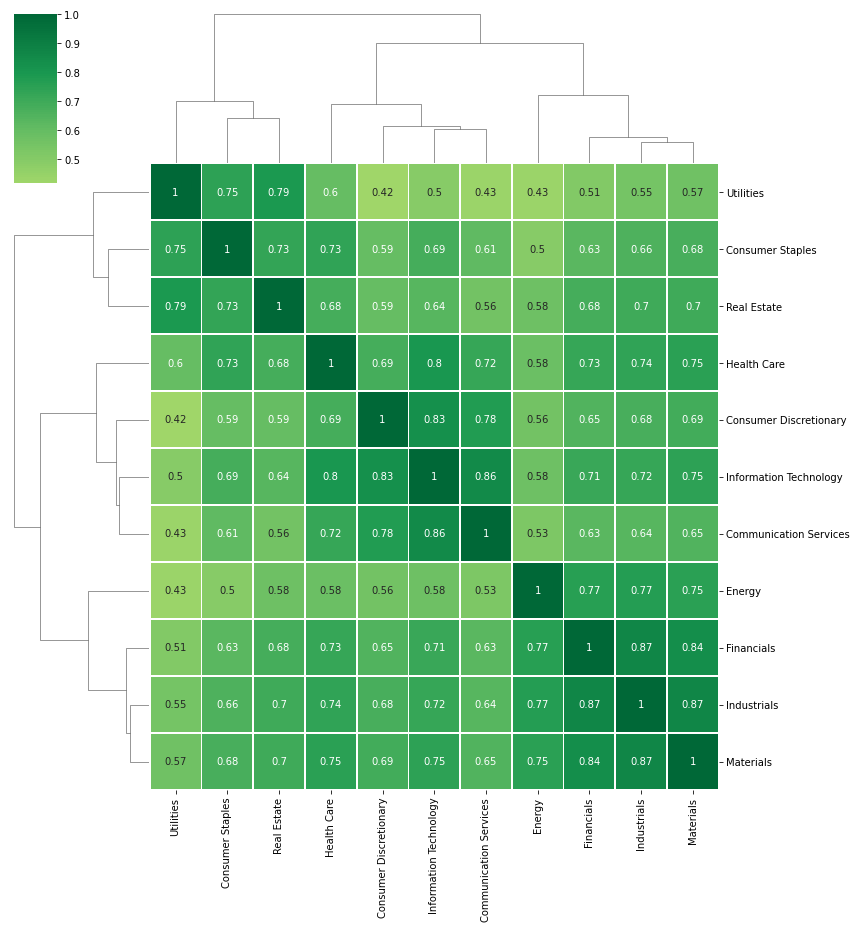

In [131]:
g = sns.clustermap(data.corr(), method='ward', center = 0.0, cmap="RdYlGn",
                   dendrogram_ratio=(.2, .2),
                   linewidths=.75, figsize=(12, 13),
                   annot = True)

In [136]:
return_each_sector = data.copy()
return_each_sector.corr()

,Industrials,Health Care,Information Technology,Communication Services,Consumer Staples,Consumer Discretionary,Utilities,Financials,Materials,Real Estate,Energy
Industrials,1.000000,0.737253,0.724342,0.638057,0.658492,0.675090,0.554631,0.869537,0.871162,0.699333,0.767072
Health Care,0.737253,1.000000,0.802485,0.722231,0.734903,0.686181,0.599030,0.726961,0.753370,0.682751,0.583366
Information Technology,0.724342,0.802485,1.000000,0.855627,0.685432,0.829389,0.498285,0.713929,0.748902,0.637247,0.577931
Communication Services,0.638057,0.722231,0.855627,1.000000,0.612509,0.777723,0.431115,0.632738,0.650588,0.561161,0.528299
Consumer Staples,0.658492,0.734903,0.685432,0.612509,1.000000,0.594174,0.745564,0.633236,0.678632,0.731320,0.496202
Consumer Discretionary,0.675090,0.686181,0.829389,0.777723,0.594174,1.000000,0.418429,0.651454,0.690899,0.594689,0.561368
Utilities,0.554631,0.599030,0.498285,0.431115,0.745564,0.418429,1.000000,0.514567,0.570629,0.788895,0.432517
Financials,0.869537,0.726961,0.713929,0.632738,0.633236,0.651454,0.514567,1.000000,0.836677,0.681074,0.765390
Materials,0.871162,0.753370,0.748902,0.650588,0.678632,0.690899,0.570629,0.836677,1.000000,0.702394,0.751721
Real Estate,0.699333,0.682751,0.637247,0.561161,0.731320,0.594689,0.788895,0.681074,0.702394,1.000000,0.578586


<AxesSubplot:xlabel='Date'>

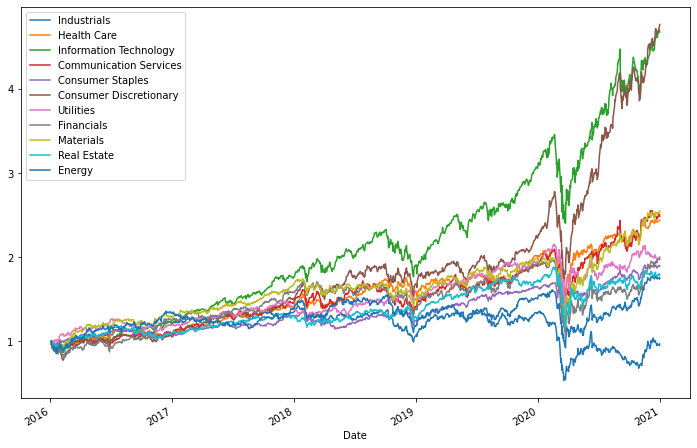

In [137]:
daily_cum_ret = (1+return_each_sector).cumprod()
daily_cum_ret.plot(legend=True, figsize=(12,8))
plt.savefig

In [216]:
daily_cum_ret

pandas.core.frame.DataFrame

In [139]:
data.cov()

,Industrials,Health Care,Information Technology,Communication Services,Consumer Staples,Consumer Discretionary,Utilities,Financials,Materials,Real Estate,Energy
Industrials,0.000224,0.000131,0.000170,0.000139,0.000100,0.000154,0.000111,0.000223,0.000187,0.000148,0.000240
Health Care,0.000131,0.000141,0.000149,0.000124,0.000088,0.000124,0.000095,0.000147,0.000128,0.000115,0.000145
Information Technology,0.000170,0.000149,0.000244,0.000194,0.000109,0.000198,0.000104,0.000191,0.000167,0.000141,0.000189
Communication Services,0.000139,0.000124,0.000194,0.000211,0.000090,0.000173,0.000083,0.000157,0.000135,0.000115,0.000161
Consumer Staples,0.000100,0.000088,0.000109,0.000090,0.000103,0.000092,0.000101,0.000110,0.000098,0.000105,0.000105
Consumer Discretionary,0.000154,0.000124,0.000198,0.000173,0.000092,0.000234,0.000085,0.000170,0.000151,0.000129,0.000180
Utilities,0.000111,0.000095,0.000104,0.000083,0.000101,0.000085,0.000177,0.000117,0.000109,0.000149,0.000121
Financials,0.000223,0.000147,0.000191,0.000157,0.000110,0.000170,0.000117,0.000292,0.000205,0.000165,0.000274
Materials,0.000187,0.000128,0.000167,0.000135,0.000098,0.000151,0.000109,0.000205,0.000205,0.000142,0.000225
Real Estate,0.000148,0.000115,0.000141,0.000115,0.000105,0.000129,0.000149,0.000165,0.000142,0.000200,0.000171


In [140]:
data.mean()

Industrials               0.000557
Health Care               0.000777
Information Technology    0.001347
Communication Services    0.000828
Consumer Staples          0.000558
Consumer Discretionary    0.001357
Utilities                 0.000639
Financials                0.000688
Materials                 0.000846
Real Estate               0.000565
Energy                    0.000195
dtype: float64

##  markovitz

In [176]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

### Normal

In [192]:
# Calculate expected annualized returns and sample covariance
mu = expected_returns.mean_historical_return(data, returns_data=True)
Sigma = risk_models.sample_cov(data, returns_data=True)

In [183]:
# Obtain the EfficientFrontier
ef = EfficientFrontier(mu, Sigma)

In [184]:
ef.max_sharpe()

OrderedDict([('Industrials', 0.0),
             ('Health Care', 0.0),
             ('Information Technology', 0.3933256928742933),
             ('Communication Services', 0.0),
             ('Consumer Staples', 0.0),
             ('Consumer Discretionary', 0.6066743071257066),
             ('Utilities', 0.0),
             ('Financials', 0.0),
             ('Materials', 0.0),
             ('Real Estate', 0.0),
             ('Energy', 0.0)])

In [185]:
# Obtain the performance number
ef.portfolio_performance(verbose=True, risk_free_rate=0.01)

Expected annual return: 36.4%
Annual volatility: 23.5%
Sharpe Ratio: 1.47


/opt/anaconda3/lib/python3.8/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:438: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  warnings.warn(


(0.3642154808563431, 0.23454589573640383, 1.4675826229046116)

In [200]:
mkt = sp500[1:]

In [205]:
mkt = mkt.to_frame(name="mkt")

In [195]:
data

,Industrials,Health Care,Information Technology,Communication Services,Consumer Staples,Consumer Discretionary,Utilities,Financials,Materials,Real Estate,Energy
Date,,,,,,,,,,,
2016-01-04,-0.012585,-0.019881,-0.013278,-0.021780,-0.010981,-0.037776,-0.002381,-0.023390,-0.011172,-0.010309,-0.003591
2016-01-05,0.000393,0.004879,-0.006036,0.000794,0.008558,-0.000238,0.008208,0.000367,-0.000174,0.018684,0.006347
2016-01-06,-0.016176,-0.007542,-0.019039,0.002575,-0.003820,-0.012250,-0.002152,-0.018365,-0.025901,-0.004701,-0.039345
2016-01-07,-0.028866,-0.020785,-0.033618,-0.024614,-0.009411,-0.027242,-0.006503,-0.031702,-0.028528,-0.021234,-0.026684
2016-01-08,-0.011108,-0.011896,-0.006763,-0.011521,-0.010065,-0.012367,0.000880,-0.016966,-0.010848,-0.009387,-0.011862
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,0.007629,0.000815,-0.008481,0.004123,0.002733,0.001677,-0.001907,0.017666,0.000448,-0.008917,0.023643
2020-12-24,-0.002732,0.002635,0.007370,0.002299,0.004718,0.002840,0.006976,-0.000524,0.005536,0.009320,-0.006731
2020-12-28,0.001141,0.002545,0.011620,0.020674,0.008756,0.013269,0.004810,0.004682,-0.001746,0.008459,-0.005831


In [209]:
mu_capm = expected_returns.capm_return(data, returns_data=True, market_prices=mkt.pct_change())
Sigma = risk_models.sample_cov(data, returns_data=True)

In [211]:
mu_capm

Industrials               0.140237
Health Care               0.117580
Information Technology    0.153762
Communication Services    0.132663
Consumer Staples          0.095093
Consumer Discretionary    0.136181
Utilities                 0.098253
Financials                0.157245
Materials                 0.135783
Real Estate               0.120097
Energy                    0.160985
Name: mkt, dtype: float64

In [212]:
ef = EfficientFrontier(mu_capm, Sigma)
ef.max_sharpe()

OrderedDict([('Industrials', 0.0623673296773674),
             ('Health Care', 0.1674323537032797),
             ('Information Technology', 0.242823155380879),
             ('Communication Services', 0.0829796439342337),
             ('Consumer Staples', 0.1428126185095493),
             ('Consumer Discretionary', 0.0399439206223213),
             ('Utilities', 0.0296521336497114),
             ('Financials', 0.1269216020800746),
             ('Materials', 0.0560846927396644),
             ('Real Estate', 0.0143935001706709),
             ('Energy', 0.0345890495322484)])

In [214]:
# Obtain the performance number
ef.portfolio_performance(verbose=True, risk_free_rate=0.01)

Expected annual return: 13.4%
Annual volatility: 19.6%
Sharpe Ratio: 0.58


(0.13358173236568782, 0.19605673160383444, 0.5793309489377737)

### Maximum Sharpe portfolio

In [235]:
# calculate the ef with mu and S
ef = EfficientFrontier(mu, Sigma)
raw_weights = ef.max_sharpe()
# get interpretable weight
cleaned_weights = ef.clean_weights()
# get performance numbers
ef.portfolio_performance(verbose=True)

Expected annual return: 36.4%
Annual volatility: 23.5%
Sharpe Ratio: 1.47


(0.3642154808563431, 0.23454589573640383, 1.4675826229046116)

In [220]:
## CAPM
ef = EfficientFrontier(mu_capm, Sigma)
raw_weights = ef.max_sharpe()

In [221]:
# get interpretable weight
cleaned_weights = ef.clean_weights()

In [222]:
# get performance numbers
ef.portfolio_performance(verbose=True)

Expected annual return: 13.4%
Annual volatility: 19.6%
Sharpe Ratio: 0.58


(0.13358173236568782, 0.19605673160383444, 0.5793309489377737)

### Minimum Volatility Portfolio

In [241]:
# calculate the ef with mu and S
ef = EfficientFrontier(mu, Sigma)
raw_weights = ef.min_volatility()
# get interpretable weight
cleaned_weights = ef.clean_weights()
ef.portfolio_performance(verbose=True)

Expected annual return: 14.9%
Annual volatility: 15.8%
Sharpe Ratio: 0.82


(0.1493429415390684, 0.1584435882443143, 0.8163343368595407)

In [226]:
#### CAPM
# calculate the ef with mu and S
ef = EfficientFrontier(mu_capm, Sigma)
raw_weights = ef.min_volatility()

In [227]:
# get interpretable weight
cleaned_weights = ef.clean_weights()
cleaned_weights

OrderedDict([('Industrials', 0.0),
             ('Health Care', 0.20073),
             ('Information Technology', 0.0),
             ('Communication Services', 0.02086),
             ('Consumer Staples', 0.7706),
             ('Consumer Discretionary', 0.0),
             ('Utilities', 0.0078),
             ('Financials', 0.0),
             ('Materials', 0.0),
             ('Real Estate', 0.0),
             ('Energy', 0.0)])

In [228]:
ef.portfolio_performance(verbose=True)

Expected annual return: 10.0%
Annual volatility: 15.8%
Sharpe Ratio: 0.51


(0.10041520018881932, 0.1584435882443143, 0.507532056550133)

## Black Little Man Monthly

In [141]:
pi = pd.Series(data.mean()*252/12, name="mean")
pi

Industrials               0.011700
Health Care               0.016327
Information Technology    0.028281
Communication Services    0.017395
Consumer Staples          0.011715
Consumer Discretionary    0.028487
Utilities                 0.013428
Financials                0.014450
Materials                 0.017769
Real Estate               0.011870
Energy                    0.004093
Name: mean, dtype: float64

In [142]:
LinkP = []
LinkP = type_sector_list + ['views']
LinkP

['Industrials',
 'Health Care',
 'Information Technology',
 'Communication Services',
 'Consumer Staples',
 'Consumer Discretionary',
 'Utilities',
 'Financials',
 'Materials',
 'Real Estate',
 'Energy',
 'views']

In [143]:
df_p = pd.DataFrame({'Industrials': [0,0], 'views': [0.015, 0.01], 'Health Care': [-1, 0],
                    'Information Technology': [0,1], 'Consumer Discretionary': [1,0], 'Real Estate': [0,-1] },columns=LinkP)
df_p = df_p.fillna(0)

In [144]:
P = df_p[type_sector_list]
Q = df_p.views
S = data.cov()*252/12

In [146]:
S

,Industrials,Health Care,Information Technology,Communication Services,Consumer Staples,Consumer Discretionary,Utilities,Financials,Materials,Real Estate,Energy
Industrials,0.004708,0.002748,0.003560,0.002917,0.002099,0.003244,0.002321,0.004674,0.003918,0.003111,0.005050
Health Care,0.002748,0.002952,0.003123,0.002614,0.001855,0.002610,0.001985,0.003094,0.002683,0.002405,0.003041
Information Technology,0.003560,0.003123,0.005132,0.004083,0.002281,0.004161,0.002177,0.004007,0.003516,0.002960,0.003972
Communication Services,0.002917,0.002614,0.004083,0.004438,0.001896,0.003628,0.001752,0.003303,0.002841,0.002424,0.003377
Consumer Staples,0.002099,0.001855,0.002281,0.001896,0.002159,0.001933,0.002113,0.002305,0.002067,0.002203,0.002212
Consumer Discretionary,0.003244,0.002610,0.004161,0.003628,0.001933,0.004904,0.001787,0.003574,0.003171,0.002700,0.003772
Utilities,0.002321,0.001985,0.002177,0.001752,0.002113,0.001787,0.003719,0.002459,0.002281,0.003119,0.002531
Financials,0.004674,0.003094,0.004007,0.003303,0.002305,0.003574,0.002459,0.006139,0.004297,0.003460,0.005754
Materials,0.003918,0.002683,0.003516,0.002841,0.002067,0.003171,0.002281,0.004297,0.004296,0.002985,0.004727
Real Estate,0.003111,0.002405,0.002960,0.002424,0.002203,0.002700,0.003119,0.003460,0.002985,0.004203,0.003599


In [147]:
P

,Industrials,Health Care,Information Technology,Communication Services,Consumer Staples,Consumer Discretionary,Utilities,Financials,Materials,Real Estate,Energy
0,0,-1,0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,-1,0


In [148]:
Q

0    0.015
1    0.010
Name: views, dtype: float64

In [175]:
np.dot(np.dot(P, S), P.T)

array([[0.00263419, 0.00074233],
       [0.00074233, 0.00341585]])

In [149]:
omega = np.matmul(np.matmul(P, S), P.T)
omega

<ipython-input-149-03c2cadc4362>:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  omega = np.matmul(np.matmul(P, S), P.T)


,0,1
0,0.002634,0.000742
1,0.000742,0.003416


In [154]:
exp_ret_1 = inv(inv(S)+np.dot(np.dot(P.T, inv(omega)), P))
pd.DataFrame(exp_ret_1, index=type_sector_list, columns=type_sector_list)

,Industrials,Health Care,Information Technology,Communication Services,Consumer Staples,Consumer Discretionary,Utilities,Financials,Materials,Real Estate,Energy
Industrials,0.004646,0.002741,0.003372,0.002755,0.002089,0.002989,0.002382,0.004609,0.003853,0.003147,0.004973
Health Care,0.002741,0.002826,0.002952,0.002505,0.001853,0.002655,0.002085,0.003073,0.002664,0.002592,0.003067
Information Technology,0.003372,0.002952,0.004377,0.003481,0.002250,0.003470,0.002476,0.003792,0.003305,0.003290,0.003779
Communication Services,0.002755,0.002505,0.003481,0.003949,0.001869,0.003012,0.001980,0.003122,0.002662,0.002651,0.003200
Consumer Staples,0.002089,0.001853,0.002250,0.001869,0.002157,0.001892,0.002123,0.002294,0.002056,0.002210,0.002200
Consumer Discretionary,0.002989,0.002655,0.003470,0.003012,0.001892,0.003802,0.001986,0.003313,0.002908,0.002740,0.003432
Utilities,0.002382,0.002085,0.002476,0.001980,0.002123,0.001986,0.003590,0.002534,0.002354,0.002947,0.002581
Financials,0.004609,0.003073,0.003792,0.003122,0.002294,0.003313,0.002534,0.006069,0.004227,0.003518,0.005676
Materials,0.003853,0.002664,0.003305,0.002662,0.002056,0.002908,0.002354,0.004227,0.004226,0.003039,0.004649
Real Estate,0.003147,0.002592,0.003290,0.002651,0.002210,0.002740,0.002947,0.003518,0.003039,0.003912,0.003593


In [155]:
exp_ret_2 = np.dot(inv(S), pi) + np.dot(np.dot(P.T, inv(omega)), Q)
pd.DataFrame(exp_ret_2, index=type_sector_list)

,0
Industrials,-4.288805
Health Care,-4.079084
Information Technology,8.470785
Communication Services,-5.204309
Consumer Staples,-1.726536
Consumer Discretionary,11.659443
Utilities,4.146952
Financials,0.423060
Materials,4.942861
Real Estate,-5.528587


In [156]:
MU_BL = np.dot(exp_ret_1, exp_ret_2)
pd.DataFrame(MU_BL, index=type_sector_list, columns=['Expected Excess Return']) # non-make sense

,Expected Excess Return
Industrials,0.011618
Health Care,0.015227
Information Technology,0.026726
Communication Services,0.016397
Consumer Staples,0.011694
Consumer Discretionary,0.028807
Utilities,0.014318
Financials,0.014245
Materials,0.017589
Real Estate,0.013520


In [157]:
w_bl = np.dot(inv(S), MU_BL) / np.dot(inv(S), MU_BL).sum()
pd.DataFrame(w_bl, index=type_sector_list, columns=['bl_weigth'])

,bl_weigth
Industrials,-0.771982
Health Care,0.045383
Information Technology,0.998294
Communication Services,-0.936772
Consumer Staples,-0.310775
Consumer Discretionary,1.319076
Utilities,0.746449
Financials,0.076151
Materials,0.889712
Real Estate,-0.468701


In [279]:
Exp_port_ret = np.dot(w_bl.T, MU_BL)
Port_var = np.dot(np.dot(w_bl, S), w_bl)
Exp_sharp_ratio = Exp_port_ret*12 / (np.sqrt(Port_var) * np.sqrt(12))

In [292]:
print('Exp_port_ret_bl : {}'.format(Exp_port_ret * 12) )
print('Port_var : {}'.format(Port_var * 12))
print('Exp_sharp_ratio : {}'.format(Exp_sharp_ratio))

Exp_port_ret_bl : 0.6716274084555347
Port_var : 0.12089247157010315
Exp_sharp_ratio : 1.931651531238874


In [260]:
Port_var * np.sqrt(12)

0.03489865050199911

In [257]:
np.sqrt(21) * Port_var

0.046166575160024544

In [250]:
np.sqrt(Port_var)

0.10037117430239585

In [249]:
Exp_port_ret*12 / np.sqrt(Port_var)*12

80.2972462709748

### Maximum Sharpe portfolio BL

In [238]:
MU_BL_yearly = MU_BL*12

In [286]:
MU_BL_yearly

array([0.13941886, 0.18272287, 0.32071111, 0.19676502, 0.14032928,
       0.34568692, 0.17182113, 0.17094243, 0.21106955, 0.16224541,
       0.05158588])

In [289]:
# calculate the ef with mu and S
ef = EfficientFrontier(MU_BL_yearly, Sigma)
raw_weights = ef.max_sharpe()
# get interpretable weight
cleaned_weights = ef.clean_weights()
# get performance numbers
ef.portfolio_performance(verbose=True)

Expected annual return: 32.2%
Annual volatility: 22.2%
Sharpe Ratio: 1.36


(0.3221315583368226, 0.22216751854193373, 1.3599267810150015)

In [290]:
raw_weights 

OrderedDict([('Industrials', 0.0),
             ('Health Care', 0.0),
             ('Information Technology', 0.1608208201316442),
             ('Communication Services', 0.0),
             ('Consumer Staples', 0.0),
             ('Consumer Discretionary', 0.7268009472981829),
             ('Utilities', 0.1123782325701727),
             ('Financials', 0.0),
             ('Materials', 0.0),
             ('Real Estate', 0.0),
             ('Energy', 0.0)])

In [242]:
# calculate the ef with mu and S
ef = EfficientFrontier(MU_BL_yearly, Sigma)
raw_weights = ef.min_volatility()
# get interpretable weight
cleaned_weights = ef.clean_weights()
ef.portfolio_performance(verbose=True)

Expected annual return: 15.0%
Annual volatility: 15.8%
Sharpe Ratio: 0.82


(0.1502620869706098, 0.1584435882443143, 0.822135426330729)

In [243]:
cleaned_weights

OrderedDict([('Industrials', 0.0),
             ('Health Care', 0.20073),
             ('Information Technology', 0.0),
             ('Communication Services', 0.02086),
             ('Consumer Staples', 0.7706),
             ('Consumer Discretionary', 0.0),
             ('Utilities', 0.0078),
             ('Financials', 0.0),
             ('Materials', 0.0),
             ('Real Estate', 0.0),
             ('Energy', 0.0)])